## Importing libraries :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Discovering the dataset :

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/datasets (1)/cyberthreat.csv")
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,1024,Phishing
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,512,DoS
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,256,Man-in-the-Middle
3,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,128,DDoS
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,2048,SQL Injection


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Protocol                750 non-null    object
 1   Flag                    750 non-null    object
 2   Packet                  750 non-null    object
 3   Sender ID               750 non-null    int64 
 4   Receiver ID             750 non-null    int64 
 5   Source IP Address       750 non-null    object
 6   Destination IP Address  750 non-null    object
 7   Source Port             750 non-null    int64 
 8   Destination Port        750 non-null    int64 
 9   Packet Size             750 non-null    int64 
 10  Target Variable         750 non-null    object
dtypes: int64(5), object(6)
memory usage: 64.6+ KB


As we see here, we have no NaN values in our dataset. But we still need to convert some columns into the category data type.

In [5]:
dataset["Protocol"] = dataset["Protocol"].astype("category")
dataset["Flag"] = dataset["Flag"].astype("category")
dataset["Packet"] = dataset["Packet"].astype("category")
dataset["Target Variable"] = dataset["Target Variable"].astype("category")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Protocol                750 non-null    category
 1   Flag                    750 non-null    category
 2   Packet                  750 non-null    category
 3   Sender ID               750 non-null    int64   
 4   Receiver ID             750 non-null    int64   
 5   Source IP Address       750 non-null    object  
 6   Destination IP Address  750 non-null    object  
 7   Source Port             750 non-null    int64   
 8   Destination Port        750 non-null    int64   
 9   Packet Size             750 non-null    int64   
 10  Target Variable         750 non-null    category
dtypes: category(4), int64(5), object(2)
memory usage: 45.1+ KB


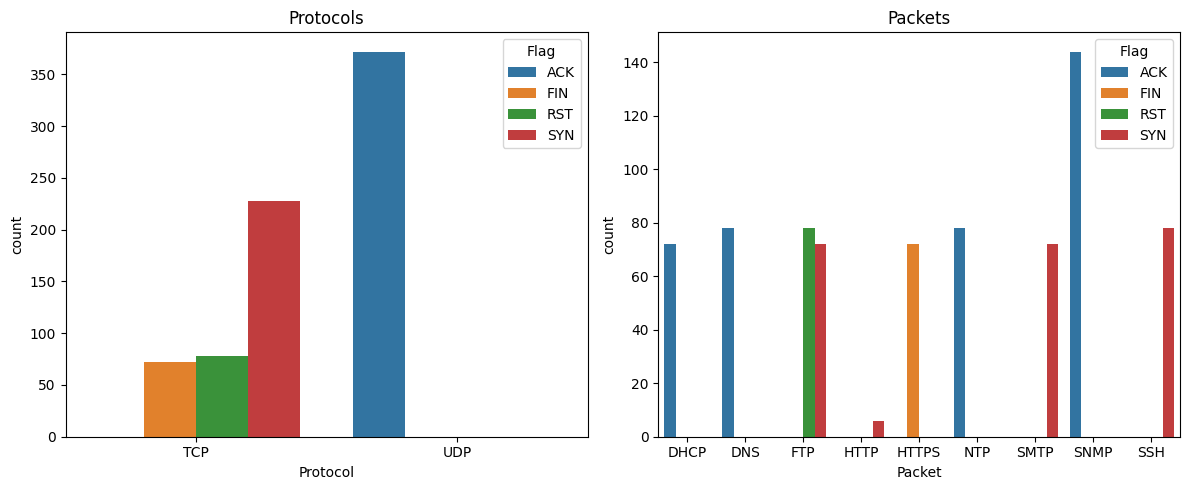

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Protocol", hue="Flag")
plt.title('Protocols')

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Packet", hue="Flag")
plt.title('Packets')

plt.tight_layout()

plt.show()

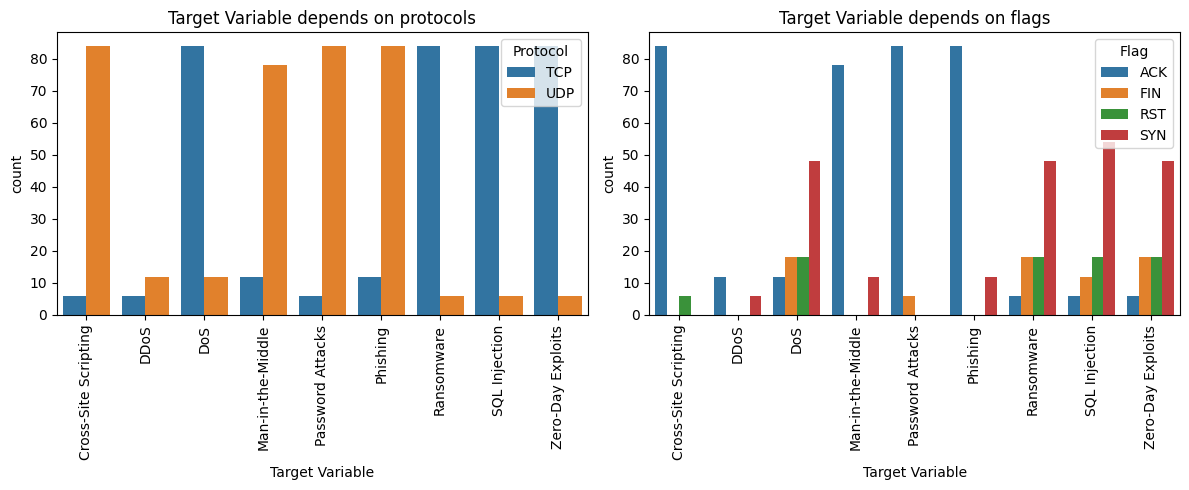

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Target Variable", hue="Protocol")
plt.title('Target Variable depends on protocols')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Target Variable", hue="Flag")
plt.title('Target Variable depends on flags')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

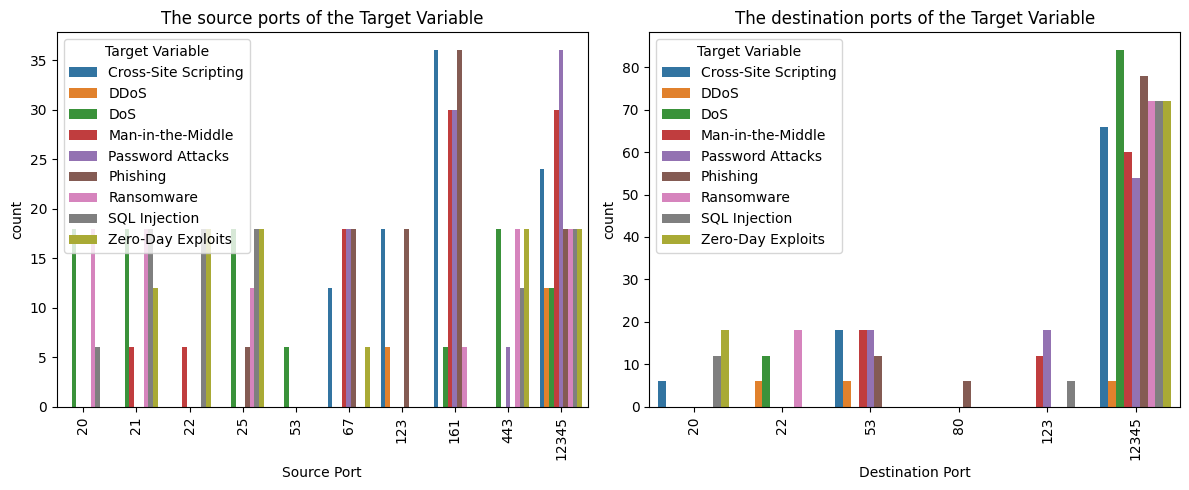

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Source Port", hue="Target Variable")
plt.title('The source ports of the Target Variable')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Destination Port", hue="Target Variable")
plt.title('The destination ports of the Target Variable')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

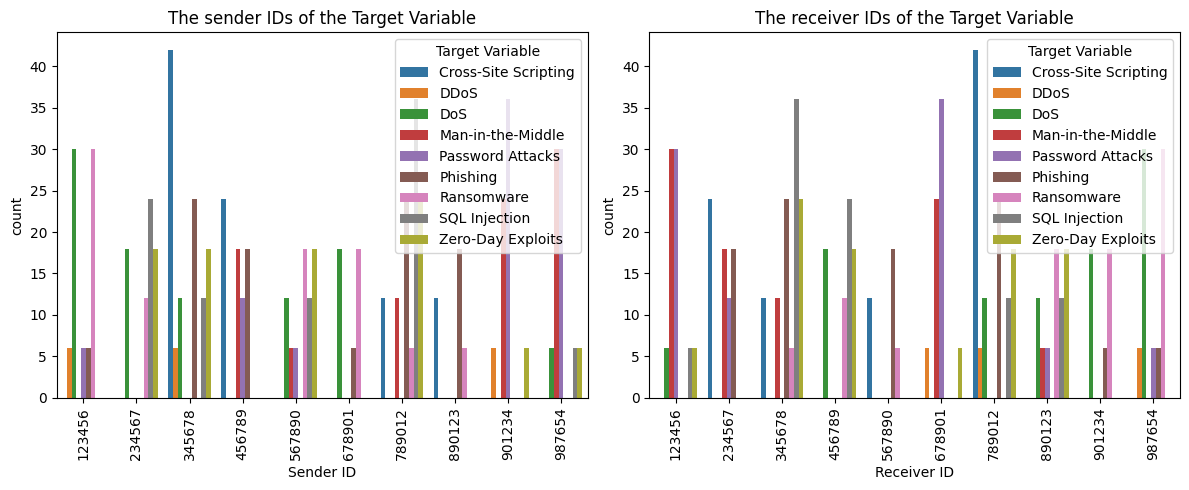

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Sender ID", hue="Target Variable")
plt.title('The sender IDs of the Target Variable')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Receiver ID", hue="Target Variable")
plt.title('The receiver IDs of the Target Variable')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

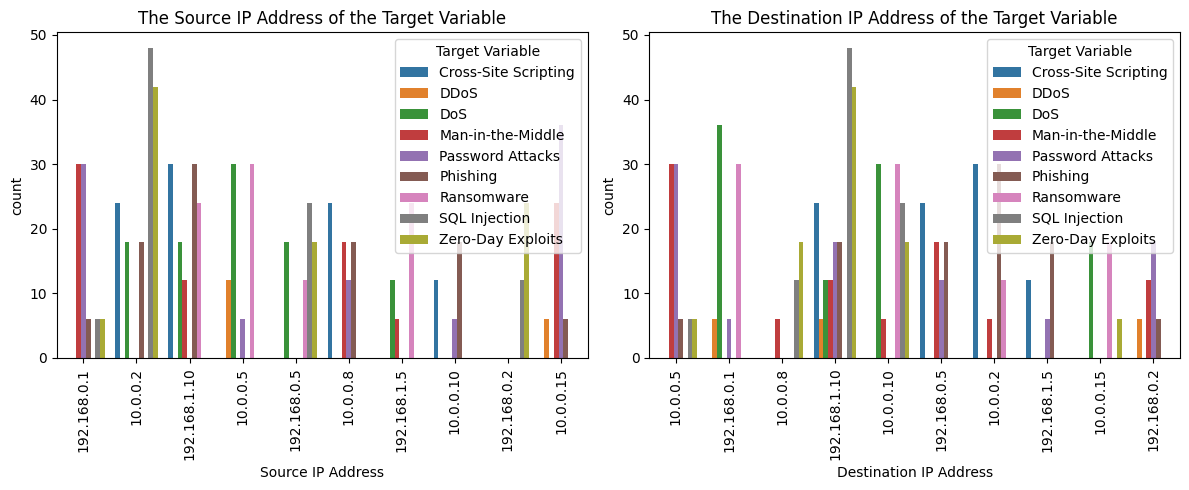

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Source IP Address", hue="Target Variable")
plt.title('The Source IP Address of the Target Variable')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Destination IP Address", hue="Target Variable")
plt.title('The Destination IP Address of the Target Variable')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

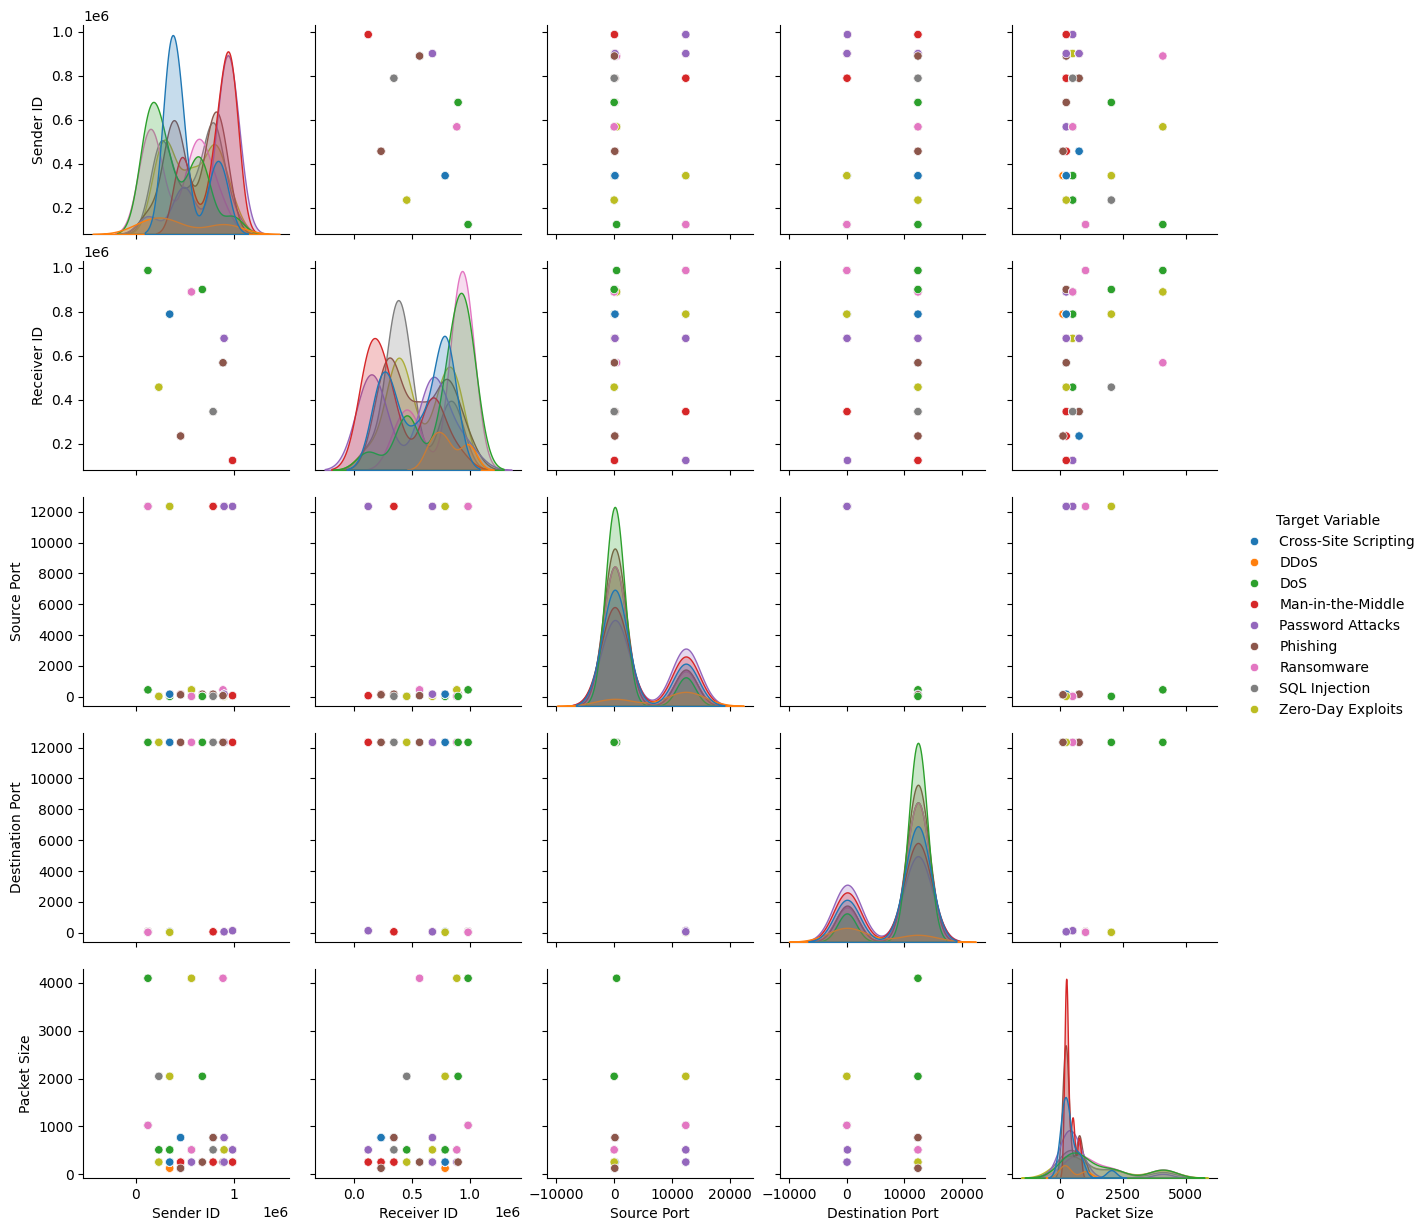

In [32]:
sns.pairplot(data=dataset, hue="Target Variable")
plt.show()